# Generate Barplots for the 24 Selected States in the Monthly Milk-Report Data
_Paulo G. Martinez,_ 12-17-2020

Let's use the data from the tidied up monthly milk report on Google sheets cause that's what Matt is using.
- https://docs.google.com/spreadsheets/d/1XM5vbuqKp0xxEmlO9rPA1X6VYR8UdydPF91LGPBBHGY/edit#gid=1544738826
    - consulted 12-17-2020

**Imports**

In [1]:
# for tabular manipulation
import pandas as pd
# for OS-agnostic path handling
import pathlib
# for interactive plots
import plotly.express as px
import plotly.graph_objects as go

# for regex
import re

In [2]:
verbose = True

**read the data**

In [3]:
!ls data/

aug-milk-prod-24stRprtMnthsLngYrsPrsntLst.tsv
milk_production_national_month_2019_2020.tsv
milk_production_national_monthly.tsv


In [4]:
# declare the path
data_path = pathlib.Path("data/aug-milk-prod-24stRprtMnthsLngYrsPrsntLst.tsv")
# read the data
df = pd.read_csv(filepath_or_buffer=data_path,
                                  # using tab separated values
                                  sep = "\t",
                                 )

In [5]:
df.head()

,Milk Cows,Milk Per Cow,Milk Production (lbs),State,Year,Month
0,"195,000","1,940","378,000,000",Arizona,2019,July
1,"1,725,000","1,965","3,390,000,000",California,2019,July
2,"187,000","2,205","412,000,000",Colorado,2019,July
3,"115,000","1,670","192,000,000",Florida,2019,July
4,"81,000","1,765","143,000,000",Georgia,2019,July


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Milk Cows              96 non-null     object
 1   Milk Per Cow           96 non-null     object
 2   Milk Production (lbs)  96 non-null     object
 3   State                  96 non-null     object
 4   Year                   96 non-null     int64 
 5   Month                  96 non-null     object
dtypes: int64(1), object(5)
memory usage: 4.6+ KB


## rename the columns to match the presentation

In [7]:
df = df.rename(columns = {"Milk Per Cow":"Milk Per Cow (Lbs)",
                    "Milk Production (lbs)": "Milk Production (Lbs)",
                    })
df.head()

,Milk Cows,Milk Per Cow (Lbs),Milk Production (Lbs),State,Year,Month
0,"195,000","1,940","378,000,000",Arizona,2019,July
1,"1,725,000","1,965","3,390,000,000",California,2019,July
2,"187,000","2,205","412,000,000",Colorado,2019,July
3,"115,000","1,670","192,000,000",Florida,2019,July
4,"81,000","1,765","143,000,000",Georgia,2019,July


## prepare the columns for tidy plotting
### compress Year and Month into a datetime index

In [8]:
# overwrite the index
df.index = pd.to_datetime(
    # unpack month and year values into string expression of date
    [f"{m}-{y}" for m,y in df[["Month", "Year"]].values]
    # offset to the end of the month
) + pd.offsets.MonthEnd(0)

# give the index a helpful name
df.index.name = "Date"

In [9]:
df.head()

,Milk Cows,Milk Per Cow (Lbs),Milk Production (Lbs),State,Year,Month
Date,,,,,,
2019-07-31,"195,000","1,940","378,000,000",Arizona,2019,July
2019-07-31,"1,725,000","1,965","3,390,000,000",California,2019,July
2019-07-31,"187,000","2,205","412,000,000",Colorado,2019,July
2019-07-31,"115,000","1,670","192,000,000",Florida,2019,July
2019-07-31,"81,000","1,765","143,000,000",Georgia,2019,July


### cast the columns to numeric

In [10]:
# disclosure_sentinels to handle
disc_sents_dct = {
    col: sum(["D" in str(cell) for cell in df[col].dropna().values])
    for col in df
                 }

if verbose:
    feedback = "Checking for count of Disclosure Nulls in each column"
    print(feedback + "\n" + "-"*len(feedback))
    print(disc_sents_dct)

Checking for count of Disclosure Nulls in each column
-----------------------------------------------------
{'Milk Cows': 0, 'Milk Per Cow (Lbs)': 0, 'Milk Production (Lbs)': 0, 'State': 4, 'Year': 0, 'Month': 0}


In [11]:
for col in df:
    if col not in {"State", "Year", "Month"}:
        df[col] = df[col].apply(
            lambda v: int("".join(v.split(","))) if type(v) == str else v
        )

In [12]:
df.head()

,Milk Cows,Milk Per Cow (Lbs),Milk Production (Lbs),State,Year,Month
Date,,,,,,
2019-07-31,195000,1940,378000000,Arizona,2019,July
2019-07-31,1725000,1965,3390000000,California,2019,July
2019-07-31,187000,2205,412000000,Colorado,2019,July
2019-07-31,115000,1670,192000000,Florida,2019,July
2019-07-31,81000,1765,143000000,Georgia,2019,July


## For each Month get State Barplots

In [52]:
df.groupby(["Year", "Month"]).unstack()

AttributeError: 'DataFrameGroupBy' object has no attribute 'unstack'

Year  Month 
2019  August    [AxesSubplot(0.125,0.71587;0.775x0.16413), Axe...
      July      [AxesSubplot(0.125,0.71587;0.775x0.16413), Axe...
2020  August    [AxesSubplot(0.125,0.71587;0.775x0.16413), Axe...
      July      [AxesSubplot(0.125,0.71587;0.775x0.16413), Axe...
dtype: object

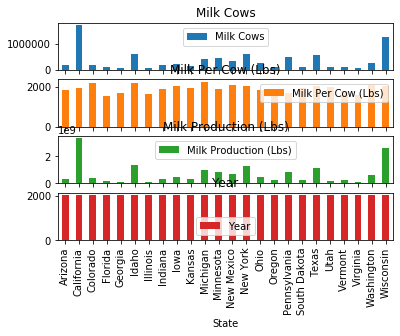

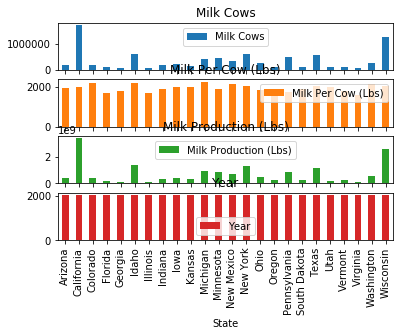

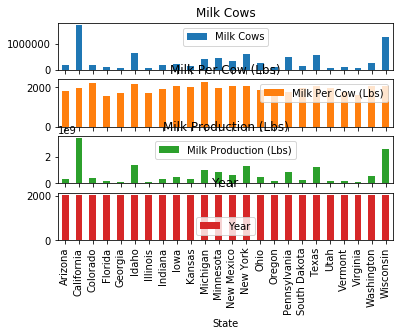

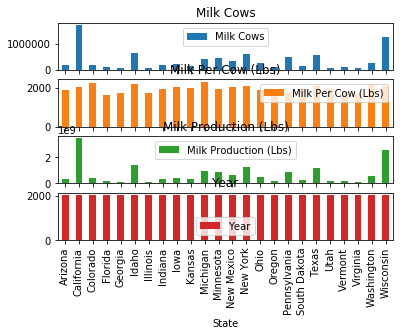

In [44]:
df.groupby(["Year", "Month"]).plot.bar(x = "State", subplots = True)


Year  Month 
2019  August    [AxesSubplot(0.125,0.732174;0.775x0.147826), A...
      July      [AxesSubplot(0.125,0.732174;0.775x0.147826), A...
2020  August    [AxesSubplot(0.125,0.732174;0.775x0.147826), A...
      July      [AxesSubplot(0.125,0.732174;0.775x0.147826), A...
dtype: object

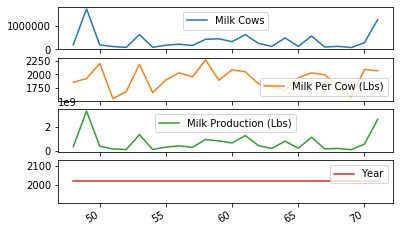

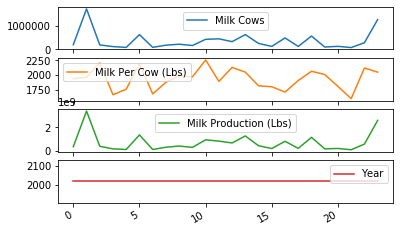

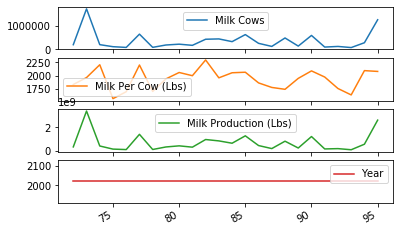

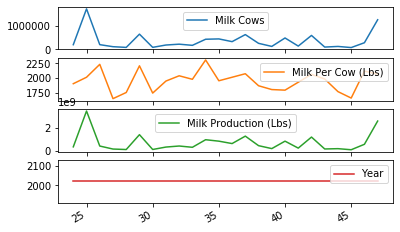

In [34]:
df.reset_index(drop = True).groupby(["Year", "Month"]).plot.bar()(subplots = True)

In [28]:
df.set_index("State").pivot()

KeyError: 'None of [None] are in the columns'

In [22]:
df.drop(columns = ["Year", "Month"]).groupby("Date").head()

,Milk Cows,Milk Per Cow (Lbs),Milk Production (Lbs),State
Date,,,,
2019-07-31,195000,1940,378000000,Arizona
2019-07-31,1725000,1965,3390000000,California
2019-07-31,187000,2205,412000000,Colorado
2019-07-31,115000,1670,192000000,Florida
2019-07-31,81000,1765,143000000,Georgia
2020-07-31,196000,1905,373000000,Arizona
2020-07-31,1721000,2015,3468000000,California
2020-07-31,198000,2235,443000000,Colorado
2020-07-31,111000,1650,183000000,Florida


In [50]:
fig = px.bar(df, x = "State", y = "Milk Cows",
            barmode="group")
fig.show()